In [4]:
import pandas as pd

# Clean data

In [5]:
data = pd.read_csv('/media/jess/DATA/PhD/cnn_bakeoff2/outputs/model_results.csv')
data['number_of_images'] = data['number_of_images'].astype(float)
data['fold'] = data['fold'].astype(float)
data['mAP'] = data['mAP'].astype(float)
data

,number_of_images,model,fold,class,mAP,augmented
0,10.0,yolov8n,1.0,all,0.243,No
1,10.0,yolov8n,2.0,all,0.420,No
2,10.0,yolov8n,3.0,all,0.914,No
3,10.0,yolov8n,4.0,all,0.944,No
4,10.0,yolov8n,5.0,all,0.995,No
...,...,...,...,...,...,...
295,100.0,yolov8x,1.0,all,0.778,Yes
296,100.0,yolov8x,2.0,all,0.978,Yes
297,100.0,yolov8x,3.0,all,0.959,Yes
298,100.0,yolov8x,4.0,all,0.976,Yes


## Get mean from each model

In [6]:
import numpy as np

data_stats = data.groupby(['augmented', 'number_of_images', 'model']).agg(mean=('mAP', 'mean'), sd=('mAP', 'std')).reset_index()
data_stats

,augmented,number_of_images,model,mean,sd
0,No,10.0,yolov8l,0.4940,0.182041
1,No,10.0,yolov8m,0.6368,0.266911
2,No,10.0,yolov8n,0.7032,0.346249
3,No,10.0,yolov8s,0.7596,0.241036
4,No,10.0,yolov8x,0.4592,0.161300
5,No,20.0,yolov8l,0.4790,0.097553
6,No,20.0,yolov8m,0.7176,0.111760
7,No,20.0,yolov8n,0.9290,0.147580
8,No,20.0,yolov8s,0.7818,0.154896
9,No,20.0,yolov8x,0.5228,0.062315


In [11]:
data_before_aug = data_stats[data_stats['augmented']=='No']
data_before_aug

,augmented,number_of_images,model,mean,sd
0,No,10.0,yolov8l,0.4940,0.182041
1,No,10.0,yolov8m,0.6368,0.266911
2,No,10.0,yolov8n,0.7032,0.346249
3,No,10.0,yolov8s,0.7596,0.241036
4,No,10.0,yolov8x,0.4592,0.161300
5,No,20.0,yolov8l,0.4790,0.097553
6,No,20.0,yolov8m,0.7176,0.111760
7,No,20.0,yolov8n,0.9290,0.147580
8,No,20.0,yolov8s,0.7818,0.154896
9,No,20.0,yolov8x,0.5228,0.062315


In [12]:
data_after_aug = data_stats[data_stats['number_of_images']<250]
data_after_aug

,augmented,number_of_images,model,mean,sd
0,No,10.0,yolov8l,0.4940,0.182041
1,No,10.0,yolov8m,0.6368,0.266911
2,No,10.0,yolov8n,0.7032,0.346249
3,No,10.0,yolov8s,0.7596,0.241036
4,No,10.0,yolov8x,0.4592,0.161300
5,No,20.0,yolov8l,0.4790,0.097553
6,No,20.0,yolov8m,0.7176,0.111760
7,No,20.0,yolov8n,0.9290,0.147580
8,No,20.0,yolov8s,0.7818,0.154896
9,No,20.0,yolov8x,0.5228,0.062315


# Plots

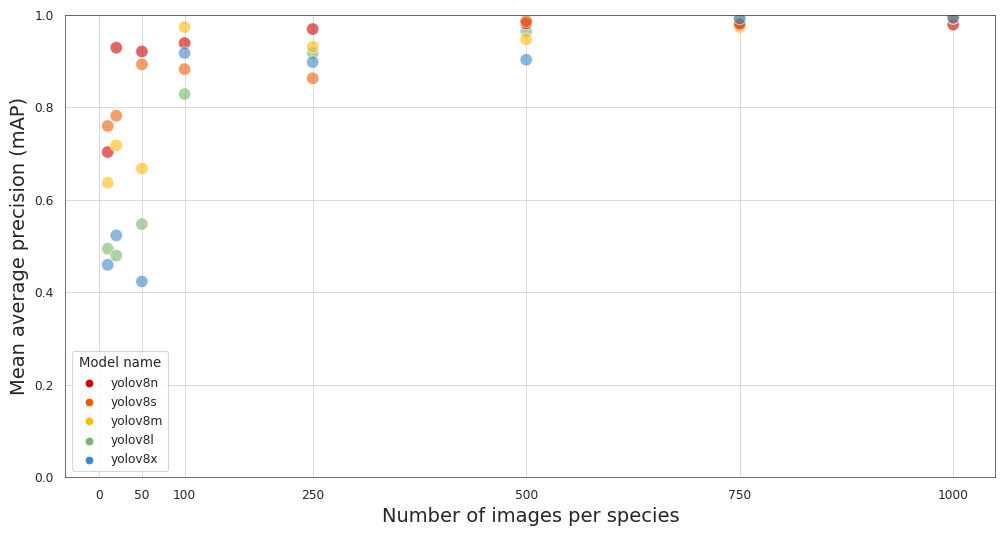

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import fontManager, FontProperties

#theme
sns.set_style('whitegrid', {
    'axes.edgecolor': '0.2'
})
sns.set_context('paper', rc={
    'axes.linewidth': '0.5',
    'grid.linewidth': '0.5',
    'grid.color': '0.9'
})

#increase figure size
plt.figure(figsize = (12, 6))

#palette
palette = ['#D00000', '#E85D04', '#FFBA08', '#7BB567', '#3F88C5']

#scatter plot
sns.scatterplot(
    data=data_stats,
    x=data_stats['number_of_images'],
    y=data_stats['mean'],
    hue='model',
    hue_order=[
        'yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x'
    ],
    palette=palette,
    s=80,
    alpha=0.6
)

#set limits
plt.ylim(0, 1)

#set axes
plt.xlabel(
    'Number of images per species',
    fontsize = 14
)
plt.ylabel(
    'Mean average precision (mAP)',
    fontsize = 14
)
plt.xticks([0, 50, 100, 250, 500, 750, 1000])

# sns.despine())

#legend settings
plt.legend(
    title='Model name',
    # title_fontsize='x-large',
    # labels=[
    #     'YOLOv8 nano',
    #     'YOLOv8 small',
    #     'YOLOv8 medium',
    #     'YOLOv8 large',
    #     'YOLOv8 X'
    # ],
    # fontsize='large',
    # shadow=True
)

#save plot
# plt.savefig("outputs/map_only.pdf", bbox_inches='tight')
    
#show plot
plt.show()

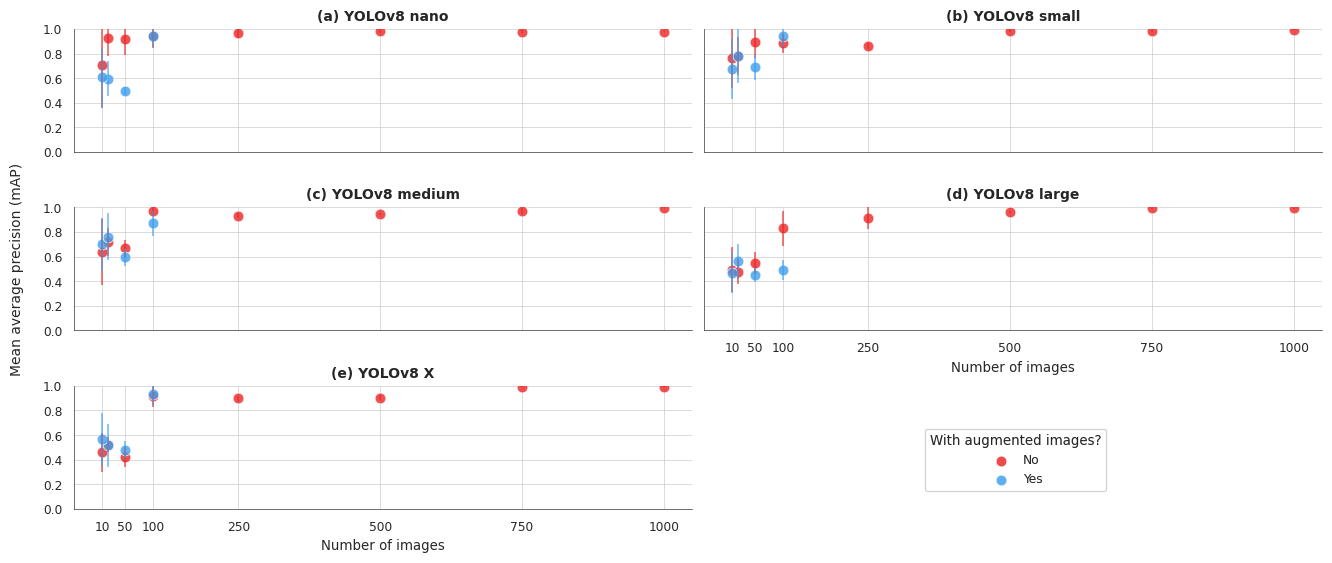

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns


#theme
sns.set_style('whitegrid', {
    'axes.edgecolor': '0.2'
})
sns.set_context('paper', rc={
    'axes.linewidth': '0.5',
    'grid.linewidth': '0.5',
    'grid.color': '0.9'
})

#palette
palette = ['#EC2424', '#3F9FEE']

#x axis tick marks
xticks = [
    10,
    50,
    100,
    250,
    500,
    750,
    1000
]

hue_order = [
    'yolov8n',
    'yolov8s',
    'yolov8m',
    'yolov8l',
    'yolov8x'
]

labels = [
    'YOLOv8 nano',
    'YOLOv8 small',
    'YOLOv8 medium',
    'YOLOv8 large',
    'YOLOv8 X'
]

# Ensure the order of models is respected in the DataFrame
data_stats['model'] = pd.Categorical(data_stats['model'], categories=hue_order, ordered=True)
data_stats = data_stats.sort_values('model')

#initialise the grid and add subplots
p = sns.FacetGrid(
    data=data_stats,
    hue='augmented',
    palette=palette,
    legend_out=True,
    col='model',
    col_wrap=2,
    height=2,
    aspect=4/1
)

#add scatterplot
p.map(
    sns.scatterplot,
    'number_of_images',
    'mean',
    s=60,
    alpha=0.8
)

#error bars
augmented_to_colour = {value: palette[idx] for idx, value in enumerate(data_stats['augmented'].unique())}
for ax in p.axes.flat:
    model = ax.get_title().split('=')[-1].strip()
    data_subset = data_stats[data_stats['model'] == model]
    augmented_groups = data_subset.groupby('augmented')
    for name, group in augmented_groups:
        colour = augmented_to_colour[name]  # Get corresponding color for the group
        ax.errorbar(group['number_of_images'], group['mean'], yerr=group['sd'], fmt='none', ecolor=colour, alpha=0.7)

#set titles
titles = ['(a) YOLOv8 nano', '(b) YOLOv8 small', '(c) YOLOv8 medium', '(d) YOLOv8 large', '(e) YOLOv8 X']
for ax, title in zip(p.axes.flat, titles):
    ax.set_title(title, fontweight = 'bold', fontsize=10)

#set axes
p.set_axis_labels('Number of images', '')
p.set(
    ylim=(0,1),
    xticks=xticks
)
plt.subplots_adjust(left=0.12, right=0.9, top=0.9, bottom=0.1)
p.fig.text(0.08, 0.5, 'Mean average precision (mAP)', va='center', rotation='vertical', fontsize=10)

#legend
legend = p.axes.flat[0].legend(title='With augmented images?', loc='upper right', bbox_to_anchor=(1.68, -2.2))
p.axes.flat[0].add_artist(legend)

#save plot
plt.savefig("/media/jess/DATA/PhD/cnn_bakeoff2/outputs/facet_plot.pdf", bbox_inches='tight')
    
#show plot
plt.show()

# Anova

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Check fold dependancy
So this actually doesn't matter since I'm reporting the mean mAP anyway, so the effect from fold should be averaged out.

In [131]:
mod = ols('mAP ~ C(fold)', data=data).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
print(mod.summary())

             sum_sq     df         F        PR(>F)
C(fold)    1.759719    4.0  9.801014  1.860080e-07
Residual  13.241415  295.0       NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                    mAP   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     9.801
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.86e-07
Time:                        15:28:09   Log-Likelihood:                 42.383
No. Observations:                 300   AIC:                            -74.77
Df Residuals:                     295   BIC:                            -56.25
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t

In [8]:
mod = ols('mAP ~ C(augmented) + C(number_of_images) + C(model)', data=data).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
print(mod.summary())

                       sum_sq     df          F        PR(>F)
C(augmented)         0.225658    1.0  10.669174  1.221548e-03
C(number_of_images)  5.231018    7.0  35.332063  2.099531e-35
C(model)             1.391558    4.0  16.448336  3.804724e-12
Residual             6.070174  287.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                    mAP   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     35.19
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.78e-49
Time:                        14:48:59   Log-Likelihood:                 159.38
No. Observations:                 300   AIC:                            -292.8
Df Residuals:                     287   BIC:                            -244.6
Df Model:                          12                     

In [7]:
mod = ols('mAP ~ C(augmented) + C(number_of_images) + C(model) + C(fold)', data=data).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
print(mod.summary())

                       sum_sq     df          F        PR(>F)
C(augmented)         0.225658    1.0  14.815400  1.466110e-04
C(number_of_images)  5.231018    7.0  49.062718  2.464862e-45
C(model)             1.391558    4.0  22.840446  2.278556e-16
C(fold)              1.759719    4.0  28.883299  3.850461e-20
Residual             4.310454  283.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                    mAP   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     43.87
Date:                Thu, 23 May 2024   Prob (F-statistic):           6.02e-67
Time:                        14:24:13   Log-Likelihood:                 210.73
No. Observations:                 300   AIC:                            -387.5
Df Residuals:                     283   BIC:                            -32

## Models

In [14]:
mod = ols('mean ~ C(number_of_images) + C(model)', data=data_before_aug).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
print(mod.summary())

                       sum_sq    df          F        PR(>F)
C(number_of_images)  0.829787   7.0  12.921096  2.698715e-07
C(model)             0.159962   4.0   4.359022  7.259541e-03
Residual             0.256878  28.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     9.808
Date:                Thu, 23 May 2024   Prob (F-statistic):           5.79e-07
Time:                        14:57:06   Log-Likelihood:                 44.203
No. Observations:                  40   AIC:                            -64.41
Df Residuals:                      28   BIC:                            -44.14
Df Model:                          11                                         
Covariance Type:            nonrobust        

In [22]:
#model tukey
tukey = pairwise_tukeyhsd(endog=data_before_aug['mean'],
                          groups=data_before_aug['model'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
yolov8l yolov8m   0.0781 0.9001 -0.1752 0.3314  False
yolov8l yolov8n    0.148 0.4588 -0.1053 0.4013  False
yolov8l yolov8s   0.1156 0.6858 -0.1377 0.3689  False
yolov8l yolov8x  -0.0134 0.9999 -0.2667 0.2399  False
yolov8m yolov8n     0.07 0.9306 -0.1833 0.3232  False
yolov8m yolov8s   0.0375 0.9928 -0.2158 0.2908  False
yolov8m yolov8x  -0.0915 0.8357 -0.3448 0.1618  False
yolov8n yolov8s  -0.0325 0.9959 -0.2857 0.2208  False
yolov8n yolov8x  -0.1615 0.3718 -0.4147 0.0918  False
yolov8s yolov8x   -0.129 0.5917 -0.3823 0.1243  False
-----------------------------------------------------


In [23]:
#number of images tukey
tukey = pairwise_tukeyhsd(endog=data_before_aug['mean'],
                          groups=data_before_aug['number_of_images'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  10.0   20.0   0.0755 0.9633 -0.1583 0.3093  False
  10.0   50.0   0.0798  0.951 -0.1541 0.3136  False
  10.0  100.0   0.2977 0.0054  0.0639 0.5315   True
  10.0  250.0   0.3051 0.0041  0.0713 0.5389   True
  10.0  500.0    0.346 0.0009  0.1122 0.5798   True
  10.0  750.0    0.373 0.0003  0.1392 0.6069   True
  10.0 1000.0     0.38 0.0002  0.1462 0.6138   True
  20.0   50.0   0.0043    1.0 -0.2295 0.2381  False
  20.0  100.0   0.2222  0.072 -0.0116 0.4561  False
  20.0  250.0   0.2296 0.0572 -0.0042 0.4635  False
  20.0  500.0   0.2705 0.0144  0.0367 0.5043   True
  20.0  750.0   0.2976 0.0054  0.0637 0.5314   True
  20.0 1000.0   0.3045 0.0042  0.0707 0.5383   True
  50.0  100.0    0.218 0.0821 -0.0159 0.4518  False
  50.0  250.0   0.2254 0.0654 -0.0085 0.4592  False
  50.0  500.0   0.2662 0.0167  0.0324 0.5001   True
  50.0  750.

## Augmentation

In [17]:
from scipy.stats import f_oneway

f_oneway(data_after_aug['mean'][data_after_aug['augmented']=='No'],
         data_after_aug['mean'][data_after_aug['augmented']=='Yes'])

F_onewayResult(statistic=1.4507996475630298, pvalue=0.23584832147679977)

In [25]:
#augmented tukey
tukey = pairwise_tukeyhsd(endog=data_after_aug['mean'],
                          groups=data_after_aug['augmented'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    No    Yes  -0.0672 0.2358 -0.1801 0.0457  False
---------------------------------------------------
